In [41]:
import yfinance as yf
import os
import pandas as pd

In [40]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
btc_ticker = yf.Ticker("BTC-USD")

In [43]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [44]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,0,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,0,0
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,0,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,0,0
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,0,0
...,...,...,...,...,...,...,...
2022-09-13,1713.962524,1745.779053,1564.031860,1580.787964,23066821734,0,0
2022-09-14,1574.858154,1642.157227,1564.031860,1634.755005,17897150206,0,0
2022-09-15,1635.083008,1648.945679,1466.139404,1471.693481,26946275878,0,0


In [45]:
btc.index = pd.to_datetime(btc.index)

In [46]:
del btc["Dividends"]
del btc["Stock Splits"]

In [47]:
btc.columns = [c.lower() for c in btc.columns]

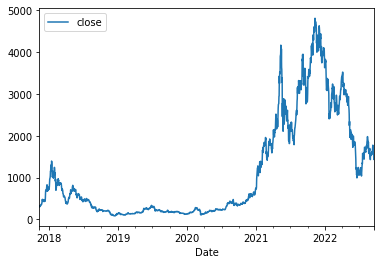

In [48]:
btc.plot.line(y="close", use_index=True)

In [49]:
from google.colab import files
uploaded=files.upload()

Saving wikipedia_edits.csv to wikipedia_edits (2).csv


In [50]:
wiki=pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [51]:
wiki

,edit_count,editor_count,ratio,difference,sentiment,neg_sentiment,total_difference
2009-04-06,0.133333,0.066667,4.408755,4.633333,-0.032780,0.033333,18.533333
2009-04-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2022-09-03,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-04,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-05,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000
2022-09-06,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000


In [52]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [53]:
btc["tomorrow"] = btc["close"].shift(-1)

In [55]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [56]:
btc["target"].value_counts()

1    909
0    855
Name: target, dtype: int64

In [57]:
btc

,open,high,low,close,volume,edit_count,editor_count,ratio,difference,sentiment,neg_sentiment,total_difference,tomorrow,target
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984,5.700000,3.533333,0.001777,195.840899,-0.486188,0.631803,1063.800000,299.252991,0
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984,4.766667,3.200000,0.001747,192.546852,-0.475620,0.610008,971.566667,314.681000,1
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992,4.466667,2.933333,0.001709,188.471852,-0.470562,0.607151,903.666667,307.907990,0
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936,4.100000,2.733333,0.001631,179.941296,-0.492871,0.619272,799.833333,316.716003,1
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984,3.800000,2.633333,0.001612,178.004630,-0.499012,0.622050,739.033333,337.631012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03,1577.213745,1579.454346,1541.672119,1556.872681,9516825994,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000,1577.641602,1
2022-09-04,1556.895874,1578.009277,1543.698853,1577.641602,8884144998,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000,1617.183228,1
2022-09-05,1577.884033,1621.661377,1559.781860,1617.183228,13060541168,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000,1561.748535,0
2022-09-06,1617.240234,1680.595337,1561.748535,1561.748535,22946059125,0.266667,0.200000,0.000092,20.588889,-0.092629,0.111111,40.200000,1629.906372,1


In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [59]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.5102040816326531

In [60]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [61]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [62]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [63]:
predictions["predictions"].value_counts()

0    396
1    273
Name: predictions, dtype: int64

In [64]:
precision_score(predictions["target"], predictions["predictions"])

0.5201465201465202

In [65]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [66]:
btc, new_predictors = compute_rolling(btc.copy())

In [67]:
predictions = backtest(btc, model, new_predictors)

In [68]:
precision_score(predictions["target"], predictions["predictions"])

0.5338645418326693

In [69]:
predictions

,target,predictions
2020-11-08,0,1
2020-11-09,1,1
2020-11-10,1,1
2020-11-11,0,0
2020-11-12,1,1
...,...,...
2022-09-03,1,0
2022-09-04,1,0
2022-09-05,0,0
2022-09-06,1,1
